In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf 


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_sp_train = '/content/drive/My Drive/project_drawings/spiral/training'
dir_sp_test = '/content/drive/My Drive/project_drawings/spiral/testing'
dir_wv_train = '/content/drive/My Drive/project_drawings/wave/training'
dir_wv_test = '/content/drive/My Drive/project_drawings/wave/testing'

In [4]:
Name=[]
for file in os.listdir(dir_sp_train):
    Name+=[file]
print(Name)
print(len(Name))

['healthy', 'parkinson']
2


In [5]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [6]:
dataset_sp=[]
count=0
for file in os.listdir(dir_sp_train):
    path=os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(128,128))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1
    
testset_sp=[]
count=0
for file in os.listdir(dir_sp_test):
    path=os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(128,128))
        image=img_to_array(image)
        image=image/255.0
        testset_sp.append([image,count])
    count=count+1 

In [7]:
dataset_wv=[]
count=0
for file in os.listdir(dir_wv_train):
    path=os.path.join(dir_wv_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(128,128))
        image=img_to_array(image)
        image=image/255.0
        dataset_wv.append([image,count])
    count=count+1
    
testset_wv=[]
count=0
for file in os.listdir(dir_wv_test):
    path=os.path.join(dir_wv_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(128,128))
        image=img_to_array(image)
        image=image/255.0
        testset_wv.append([image,count])
    count=count+1   

In [8]:
data_sp,labels_sp0=zip(*dataset_sp)
test_sp,tlabels_sp0=zip(*testset_sp)

data_wv,labels_wv0=zip(*dataset_wv)
test_wv,tlabels_wv0=zip(*testset_wv)

In [9]:
labels_sp1=to_categorical(labels_sp0)
data_sp=np.array(data_sp)
labels_sp=np.array(labels_sp1)

tlabels_sp1=to_categorical(tlabels_sp0)
test_sp=np.array(test_sp)
tlabels_sp=np.array(tlabels_sp1)

In [10]:
labels_wv1=to_categorical(labels_wv0)
data_wv=np.array(data_wv)
labels_wv=np.array(labels_wv1)

tlabels_wv1=to_categorical(tlabels_wv0)
test_wv=np.array(test_wv)
tlabels_wv=np.array(tlabels_wv1)
trainx_sp,testx_sp,trainy_sp,testy_sp=train_test_split(data_sp,labels_sp,test_size=0.2,random_state=44)
trainx_wv,testx_wv,trainy_wv,testy_wv=train_test_split(data_wv,labels_wv,test_size=0.2,random_state=44)


In [23]:
datagen = ImageDataGenerator(rotation_range=60, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    brightness_range=[0.5, 1.5],
                                    horizontal_flip=True, 
                                    vertical_flip=True,
                                    zoom_range=0.1)

In [11]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(128,128,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

pretrained_model4 = tf.keras.applications.DenseNet201(input_shape=(128,128,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [12]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [24]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
his3=model3.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),epochs=50)

Epoch 1/50
2/2 [==============================] - 17s 2s/step - loss: 1.0706 - accuracy: 0.4737
Epoch 2/50
2/2 [==============================] - 7s 4s/step - loss: 0.6524 - accuracy: 0.6140
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 0.7228 - accuracy: 0.5088
Epoch 4/50
2/2 [==============================] - 5s 3s/step - loss: 0.4968 - accuracy: 0.8070
Epoch 5/50
2/2 [==============================] - 5s 2s/step - loss: 0.5483 - accuracy: 0.7368
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.4631 - accuracy: 0.8070
Epoch 7/50
2/2 [==============================] - 5s 3s/step - loss: 0.4161 - accuracy: 0.8421
Epoch 8/50
2/2 [==============================] - 5s 2s/step - loss: 0.4435 - accuracy: 0.7719
Epoch 9/50
2/2 [==============================] - 6s 3s/step - loss: 0.3803 - accuracy: 0.8596
Epoch 10/50
2/2 [==============================] - 4s 2s/step - loss: 0.3797 - accuracy: 0.8421
Epoch 11/50
2/2 [==============================]

In [ ]:
y_pred_sp=model3.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

1/1 [==============================] - 6s 6s/step
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.86      0.67      0.75         9

    accuracy                           0.73        15
   macro avg       0.74      0.75      0.73        15
weighted avg       0.76      0.73      0.74        15



/content/drive/My Drive/Copy of 1.png
(1, 128, 128, 3)
1/1 [==============================] - 4s 4s/step
<class 'numpy.ndarray'>
Person has healthy. [[1.4251525e-37 1.0000000e+00]]


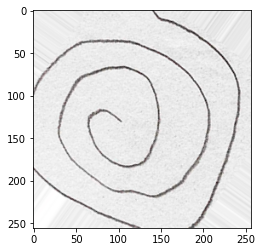

In [22]:
from PIL import Image
path = input()
image = Image.open(path)
new_img = image.resize((128,128)) 
plt.imshow(new_img)
img_array = np.asarray(new_img)
img_array = img_array.reshape(-1,128,128,3)
print(img_array.shape)
prediction = model3.predict(img_array)
print(type(prediction[0]))
if np.any(prediction) > 0.5:
    
    print("Person has healthy.",prediction)
else:
    print("Person has Parkinson",prediction)
    
plt.imshow(image)

In [14]:
datagen = ImageDataGenerator(rotation_range=5, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    brightness_range=(0.3,1.8),
                                    shear_range = 0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

In [21]:
his4=model4.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)

Epoch 1/50
2/2 [==============================] - 25s 8s/step - loss: 0.4639 - accuracy: 0.7544 - val_loss: 0.5884 - val_accuracy: 0.8000
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 0.4365 - accuracy: 0.8421 - val_loss: 0.4624 - val_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 7s 3s/step - loss: 0.4998 - accuracy: 0.7018 - val_loss: 0.4186 - val_accuracy: 0.7333
Epoch 4/50
2/2 [==============================] - 7s 5s/step - loss: 0.3110 - accuracy: 0.8596 - val_loss: 0.5277 - val_accuracy: 0.8000
Epoch 5/50
2/2 [==============================] - 5s 4s/step - loss: 0.4754 - accuracy: 0.7895 - val_loss: 0.5931 - val_accuracy: 0.8000
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 0.4276 - accuracy: 0.8246 - val_loss: 0.4689 - val_accuracy: 0.8667
Epoch 7/50
2/2 [==============================] - 5s 3s/step - loss: 0.4064 - accuracy: 0.8246 - val_loss: 0.4131 - val_accuracy: 0.8000
Epoch 8/50
2/2 [========================

In [18]:
test_loss, test_acc = model4.evaluate(testx_wv,testy_wv, verbose=2)
print("Test accuracy:", test_acc)

1/1 - 1s - loss: 0.4881 - accuracy: 0.7333 - 1s/epoch - 1s/step
Test accuracy: 0.7333333492279053


/content/drive/My Drive/Copy of 2.png
(1, 128, 128, 3)
1/1 [==============================] - 4s 4s/step
<class 'numpy.ndarray'>
Person has healthy. [[0.9910466  0.00895338]]


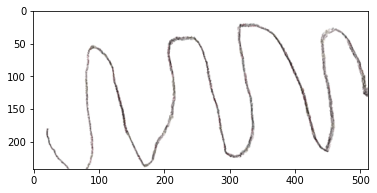

In [22]:
from PIL import Image
path = input()
image = Image.open(path)
new_img = image.resize((128,128)) 
plt.imshow(new_img)
img_array = np.asarray(new_img)
img_array = img_array.reshape(-1,128,128,3)
print(img_array.shape)
prediction = model3.predict(img_array)
print(type(prediction[0]))
if np.any(prediction) > 0.5:
    
    print("Person has healthy.",prediction)
else:
    print("Person has Parkinson",prediction)
    
plt.imshow(image)